## Проверка адекватности

In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np

## Напишем функции для получения необходимых данных

###### Функция для получения $P_i$

In [3]:
def get_pi(i, l, m, N):
    r = l/m
    p = (1+r+((r**2)/2 * (1-(r/2)**(N+1))/(1-(r/2))))**(-1)
    if (i<=1) and (i>=0):
        return (r**i * p)
    else:
        return ((r**i)/(2*2**(i-2)) * p)

###### Функция для получения вероятности отказа

In [4]:
def failure_probability(l,m,N):
    return get_pi(N+2,l,m,N)

###### Функция для получения вероятности ожидания 

In [25]:
def probability_of_waiting(l, m, N):
    return 1 - get_pi(0,l, m, N)-get_pi(1, l, m, N)

###### Функция для получения среднего количества требований в системе

In [26]:
def avg_number_requirements_in_system(l,m,N):
    r = l/m
    p = (1+r+((r**2)/2 * (1-(r/2)**(N+1))/(1-(r/2))))**(-1)
    return p*(r+((r**2)*(-2*(N+3)*(r**(N+1))+(N+2)*(r**(N+2))-(2**(N+1))*r+(2**(N+3))))/(((r-2)**2)*(2**(N+1))))
    

###### Функция для получения среднего времени ожидания

In [27]:
def avg_time_in_system1(l,m,N):
    r = l/m
    p = (1+r+((r**2)/2 * (1-(r/2)**(N+1))/(1-(r/2))))**(-1)
    
    return (1/(l*(1-get_pi(N, l, m, N))) * avg_number_requirements_in_system(l, m, N))

###### Функция для получения вероятности простоя

In [28]:
def prob_of_system_inaction(l,m,N):
    return get_pi(0,l,m,N)

In [29]:
metrics_titles = ['Average time in the system',
                  'Probabily of non-serving',
                  'Probability of waiting',
                  'Average count of customers in system',
                  'Probability of system inaction',
                  'prob_of_system_inaction']

###### Функция для построения необходимых графиков

In [30]:
def draw_metrics(params, test_metrics, param_name):
    plt.figure(figsize=(15,15))
    plt.suptitle(f'Метрики в зависимости от параметра {param_name}', y=1.05)

    i = 0

    for metric_name, values in test_metrics.items():
        plt.subplot(321+i)   
        plt.plot(params, values, 'o-')
        plt.title(metrics_titles[i])
        plt.xlabel(param_name)
        plt.ylabel(metric_name)
        plt.tight_layout()
        plt.grid()
        i += 1

    plt.show()

## 1. Рассмотрим случай для $\lambda > \mu $

Будем менять $t_{arriv}$ и зафиксируем $t_{serv}=3$.

<ipython-input-27-f786ae185762>:5: RuntimeWarning: divide by zero encountered in double_scalars
  return (1/(l*(1-get_pi(N, l, m, N))) * avg_number_requirements_in_system(l, m, N))
<ipython-input-27-f786ae185762>:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1/(l*(1-get_pi(N, l, m, N))) * avg_number_requirements_in_system(l, m, N))


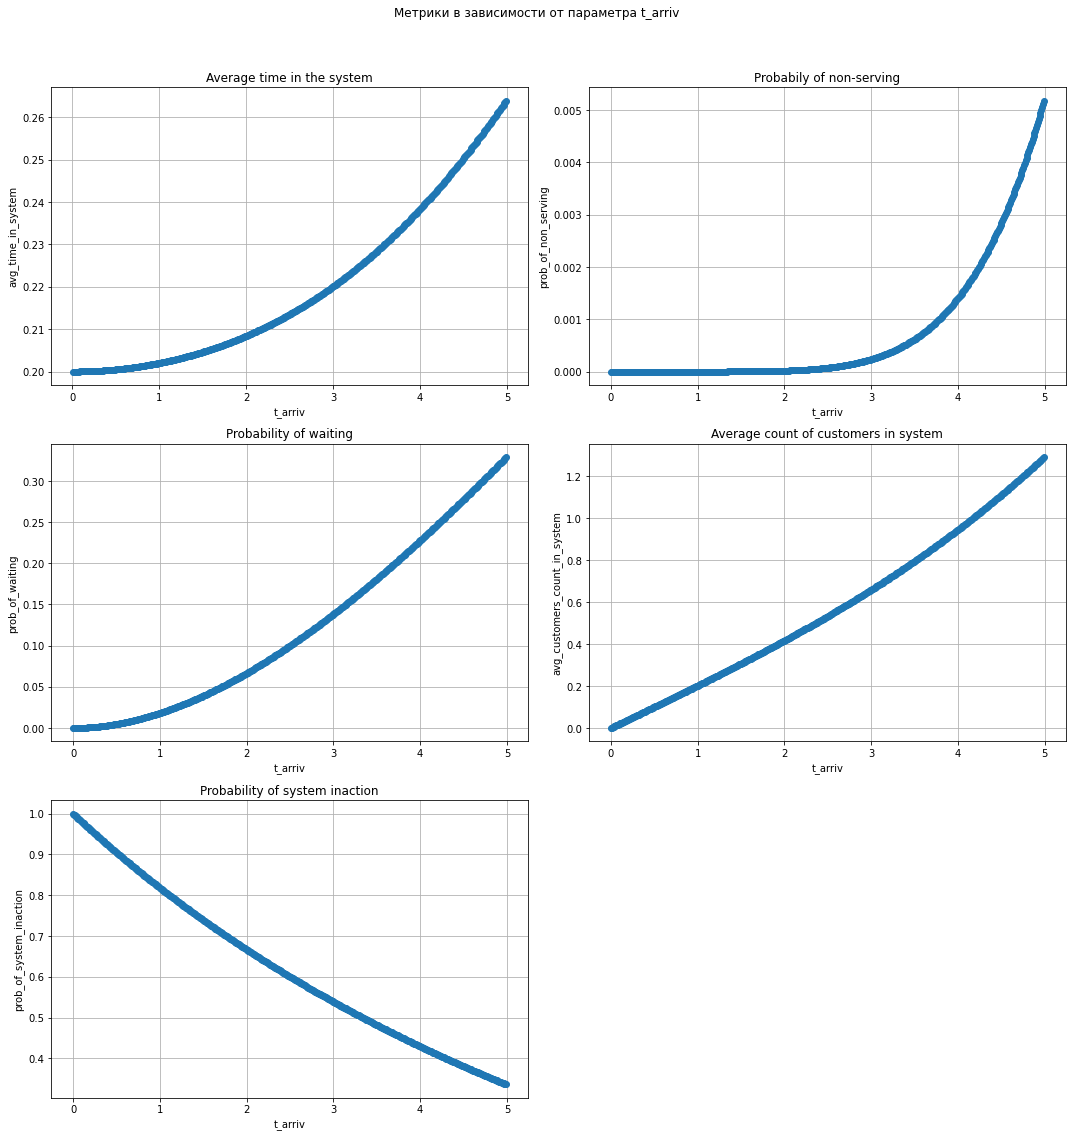

In [36]:
t_serv = 5
int_size = 0.01
t_arriv_arr = np.arange(0, t_serv, int_size)
capacity = 5

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}
for t_arriv in t_arriv_arr:
    test_metrics['prob_of_non_serving'].append(failure_probability(t_arriv,t_serv,capacity))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(t_arriv, t_serv, capacity))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(t_arriv,t_serv,capacity))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(t_arriv,t_serv,capacity))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(t_arriv,t_serv,capacity))
    
draw_metrics(t_arriv_arr, test_metrics, 't_arriv')

Теперь будем менять $t_{serv}$ и зафиксируем $t_{arriv}=1$.

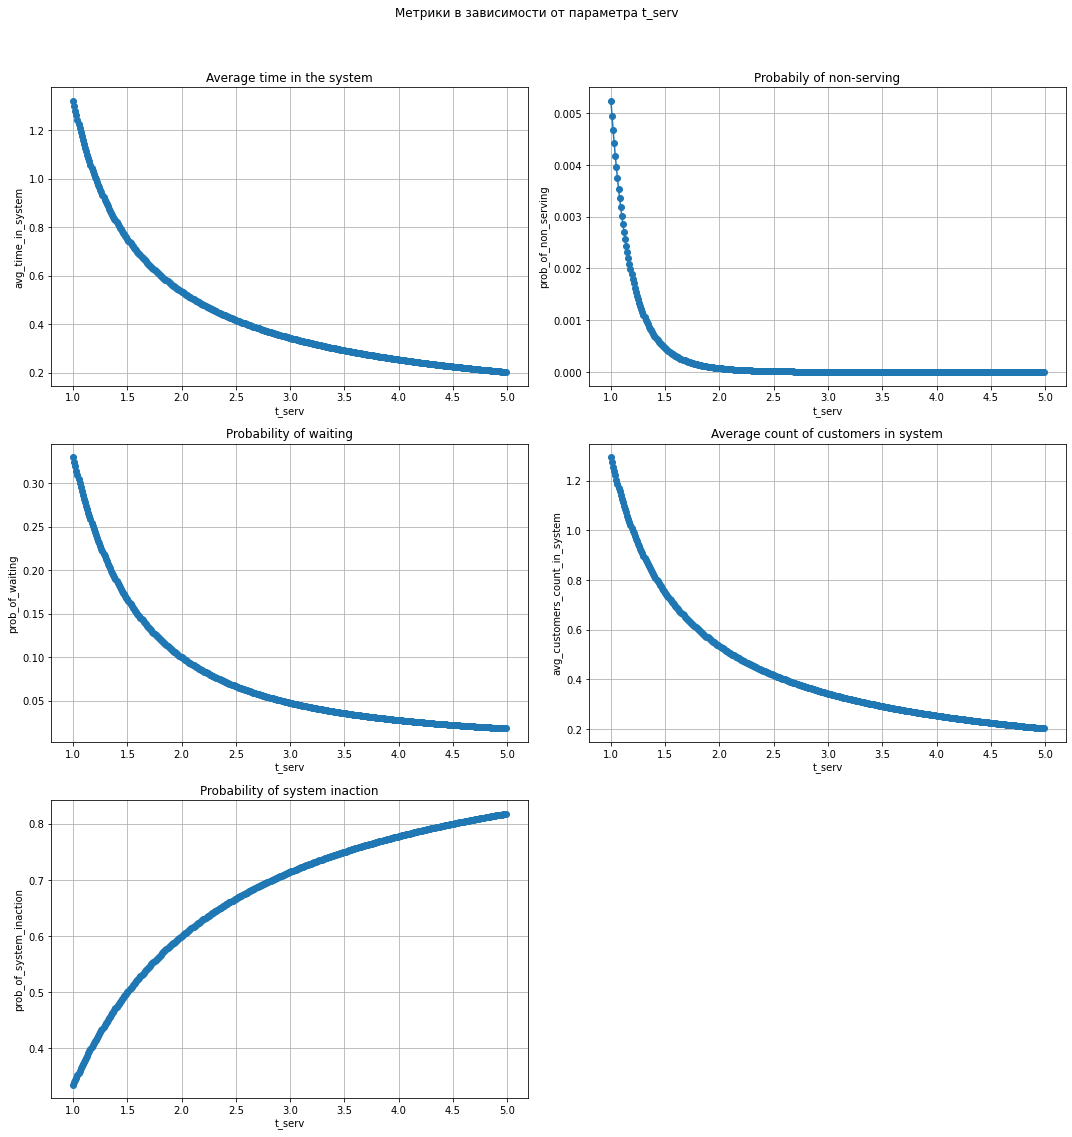

In [37]:
t_serv_arr = np.arange(1, 5, 0.01)
t_arriv = 1
capacity = 5

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}
for t_serv in t_serv_arr:
    test_metrics['prob_of_non_serving'].append(failure_probability(t_arriv,t_serv,capacity))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(t_arriv, t_serv, capacity))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(t_arriv,t_serv,capacity))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(t_arriv,t_serv,capacity))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(t_arriv,t_serv,capacity))
draw_metrics(t_serv_arr, test_metrics, 't_serv')

Зафиксируем $t_{arriv}, t_{serv}$ и посмотрим, как меняются графики при изменении размера очереди.

<ipython-input-3-1175bccb95bc>:7: RuntimeWarning: overflow encountered in long_scalars
  return ((r**i)/(2*2**(i-2)) * p)
<ipython-input-3-1175bccb95bc>:7: RuntimeWarning: divide by zero encountered in double_scalars
  return ((r**i)/(2*2**(i-2)) * p)
<ipython-input-26-f1691ab30bee>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return p*(r+((r**2)*(-2*(N+3)*(r**(N+1))+(N+2)*(r**(N+2))-(2**(N+1))*r+(2**(N+3))))/(((r-2)**2)*(2**(N+1))))
<ipython-input-27-f786ae185762>:5: RuntimeWarning: invalid value encountered in double_scalars
  return (1/(l*(1-get_pi(N, l, m, N))) * avg_number_requirements_in_system(l, m, N))


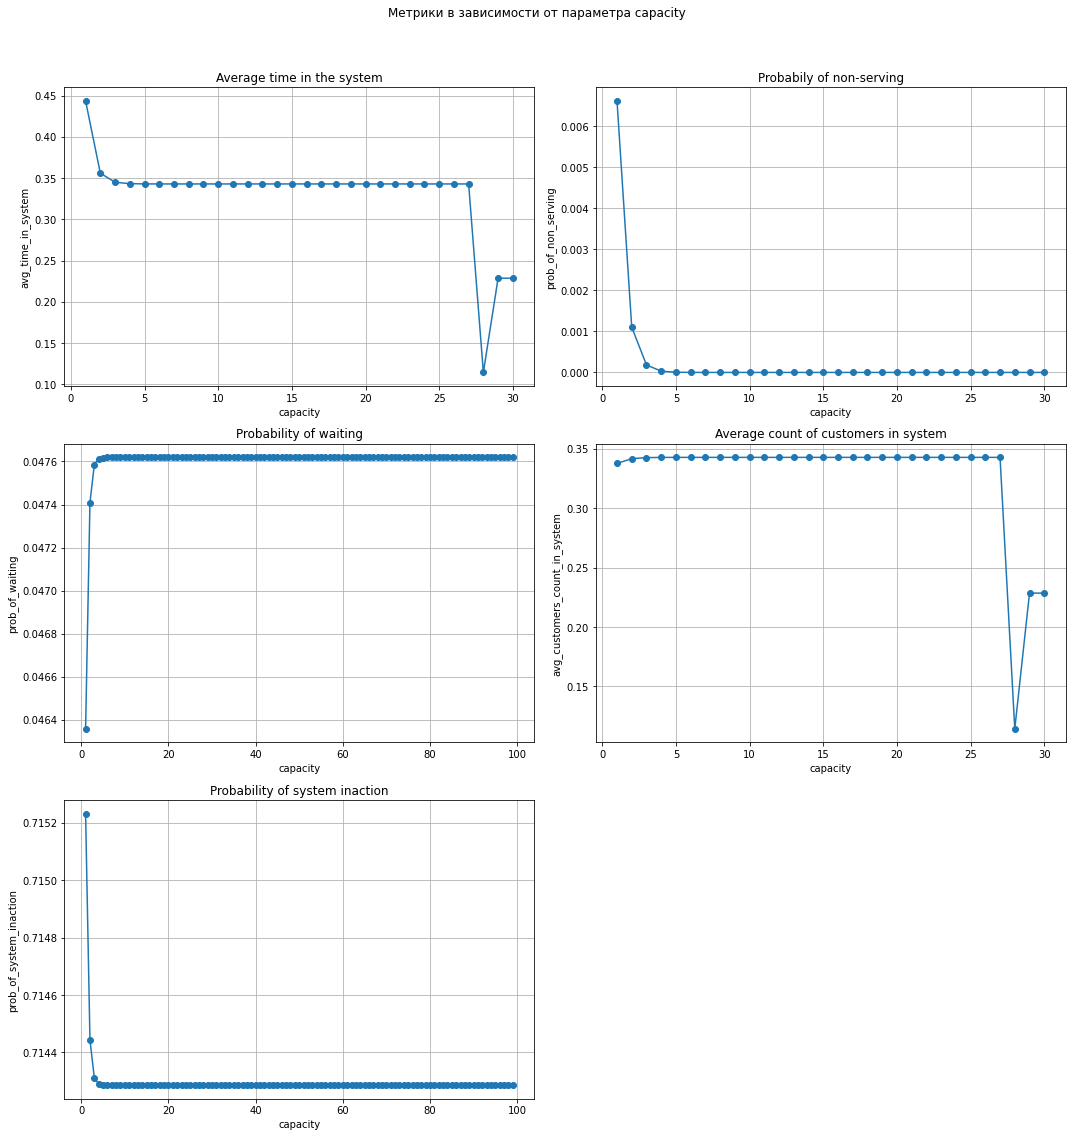

In [38]:
t_serv = 3
t_arriv = 1
capacity = np.arange(1, 100)

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}

for cap in capacity:
    test_metrics['prob_of_non_serving'].append(failure_probability(t_arriv,t_serv,cap))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(t_arriv, t_serv, cap))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(t_arriv,t_serv,cap))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(t_arriv,t_serv,cap))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(t_arriv,t_serv,cap))
draw_metrics(capacity, test_metrics, 'capacity')

## 2. Рассмотрим случай для $\lambda \leq \mu$
Зафиксируем $t_{serv}=3$, меняем $t_{arriv}$

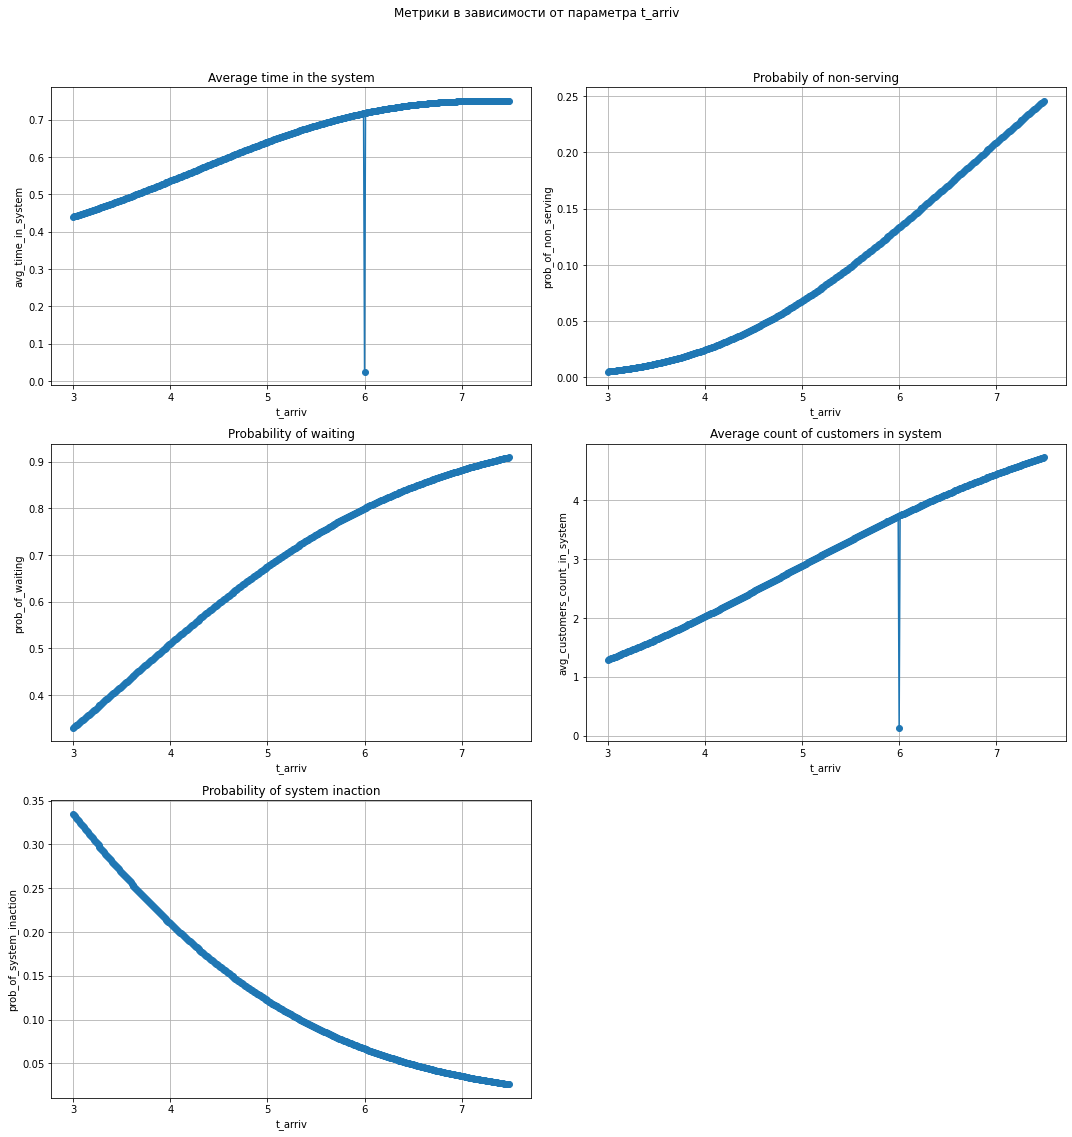

In [39]:
t_serv = 3
int_size = 0.01
t_arriv_arr = np.arange(t_serv, 5*t_serv/2, int_size)
capacity = 5

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}
for t_arriv in t_arriv_arr:
    test_metrics['prob_of_non_serving'].append(failure_probability(t_arriv,t_serv,capacity))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(t_arriv, t_serv, capacity))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(t_arriv,t_serv,capacity))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(t_arriv,t_serv,capacity))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(t_arriv,t_serv,capacity))
    
draw_metrics(t_arriv_arr, test_metrics, 't_arriv')

Зафиксируем $t_{arriv}=2$, меняем $t_{serv}$

<ipython-input-3-1175bccb95bc>:3: RuntimeWarning: invalid value encountered in double_scalars
  p = (1+r+((r**2)/2 * (1-(r/2)**(N+1))/(1-(r/2))))**(-1)
<ipython-input-26-f1691ab30bee>:4: RuntimeWarning: invalid value encountered in double_scalars
  return p*(r+((r**2)*(-2*(N+3)*(r**(N+1))+(N+2)*(r**(N+2))-(2**(N+1))*r+(2**(N+3))))/(((r-2)**2)*(2**(N+1))))


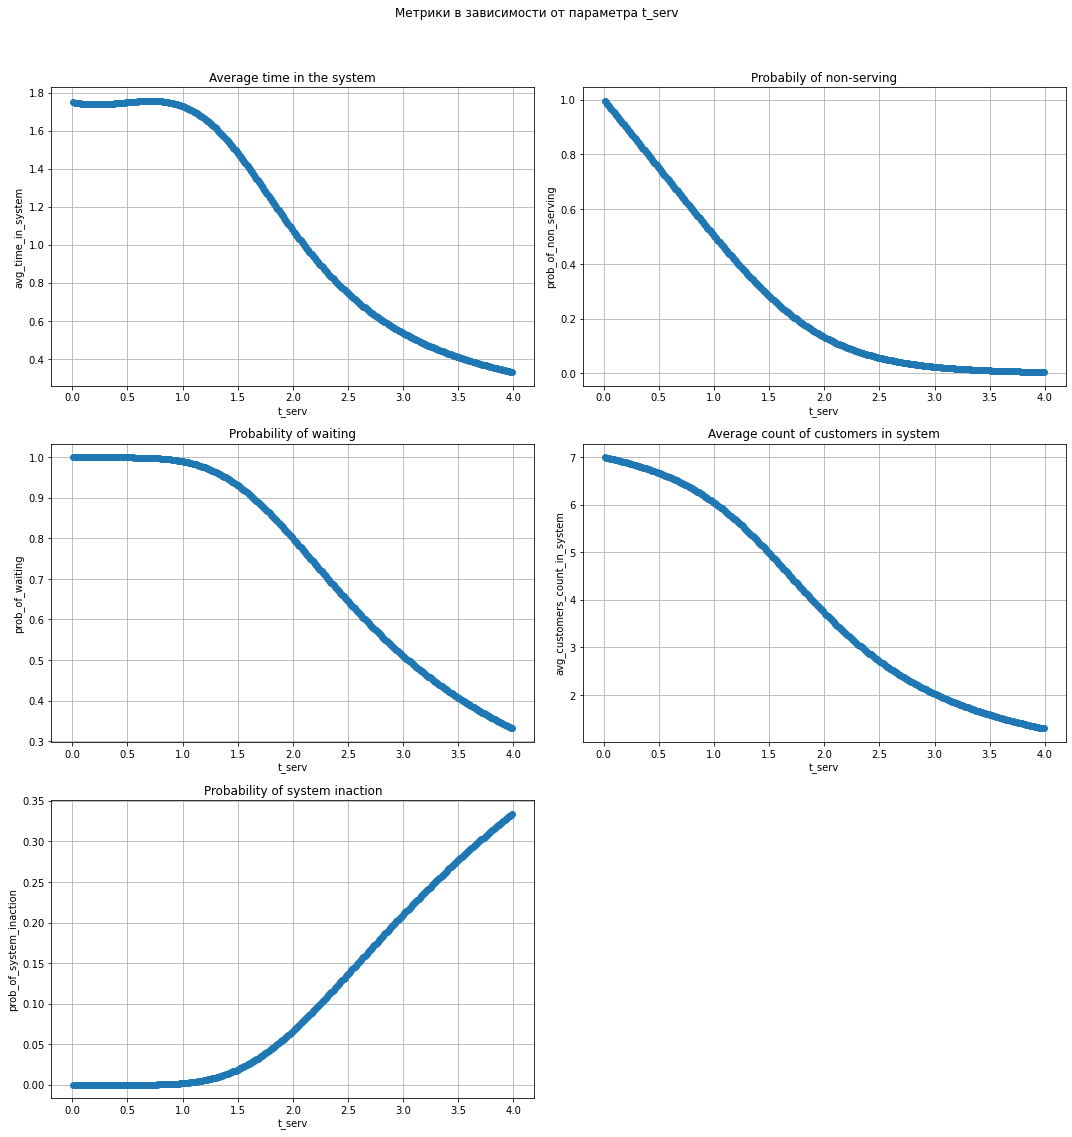

In [40]:
t_serv_arr = np.arange(0.01, 4, 0.01)
int_size = 0.01
t_arriv = 4
capacity = 5

test_metrics = {
    'avg_time_in_system': list(),
    'prob_of_non_serving': list(),
    'prob_of_waiting': list(),
    'avg_customers_count_in_system': list(),
    'prob_of_system_inaction': list()
}
for t_serv in t_serv_arr:
    test_metrics['prob_of_non_serving'].append(failure_probability(t_arriv,t_serv,capacity))
    test_metrics['prob_of_waiting'].append(probability_of_waiting(t_arriv, t_serv, capacity))
    test_metrics['avg_customers_count_in_system'].append(avg_number_requirements_in_system(t_arriv,t_serv,capacity))
    test_metrics['avg_time_in_system'].append(avg_time_in_system1(t_arriv,t_serv,capacity))
    test_metrics['prob_of_system_inaction'].append(prob_of_system_inaction(t_arriv,t_serv,capacity))
draw_metrics(t_serv_arr, test_metrics, 't_serv')